# Bank Tele Marketing data


>  ### Problem Statement
>  ### Business Model
>  ### Data Wrangling
>  ### Model Building
>  ### Logistic Regression
>  ### Support Vector Machines
>  ### Accuracy Paradox
>  ### Genetic Algorithm
>  ### Neural Network

# Problem Statement:
 >**In banks, a huge data recorded about their customers. This data can be used to create and keep direct relationship and connection with the customers in order to target them individually for definite products or banking offers. Usually, the selected customers are contacted directly through personal contact, telephone cellular, mail, and e-mail or any other contacts to advertise the new product/service or give an offer, this kind of marketing is called direct marketing. In fact, direct marketing is in the main a strategy of many of the banks and insurance companies for interacting with their customers.**

>**Historically, the name and identification of the term direct marketing suggested first time at 1967 by Lester Wunderman, which he considered the father of direct marketing . In addition, some of the banks and financial-services companies may depend only on strategy of mass marketing for promoting a new service or product to their customers. In this strategy, a single communication message broadcasted to all customers through media such as television, radio or advertising firm, etc. In this approach, companies do not set up a direct relationship with their customers for new-product offers. In fact, many of the customers are not interesting or respond to this kind of sales promotion.**

>**The purpose is increasing the campaign effectiveness by identifying the main characteristics that affect a success (the deposit subscribed by the client) based on Logistic Regression,SVM,Genetic Algorithm and MLPNN . The experimental results demonstrate, with higher accuracies, the success of these models in predicting the best campaign contact with the clients for subscribing deposit. The performances are measured by three statistical measures; classification accuracy, sensitivity, and specificity. **



    

# Business Model
>**Accordingly, banks, financial-services companies and other companies are shifting away from mass marketing strategy because its ineffectiveness and they are now targeting most of their customers by direct marketing for specific product and service offers. Due to the positive results clearly measured; many marketers attractive to the direct marketing. For example, if a marketer sends out 1,000 offers by mail and 100 respond to the promotion, the marketer can say with confidence that campaign led directly to 10% direct responses. This metric known as the 'Response Rate', and it is one of much clearly quantifiable success metrics employed by direct marketers. In dissimilarity, general advertising uses indirect measurements, such as awareness or engagement, since there is no straight response from a consumer. From the literature, the direct marketing is becoming very important application in data mining these days. The data mining widely has been used in direct marketing to identify prospective customers for new products, by using history-purchasing data, a predictive model to measure that a customer is going to respond to the promotion or an offer**

# Data Wrangling

>**What is Data Wrangling?**

  >**Data munging or data wrangling is loosely defined as the process of manually converting or mapping data from one "raw" form into another format that allows for more convenient consumption of the data with the help of semi-automated tools. This may include further munging, data visualization, data aggregation, training a statistical model, as well as many other potential uses. Data munging as a process typically follows a set of general steps which begin with extracting the data in a raw form from the data source, "munging" the raw data using algorithms (e.g. sorting) or parsing the data into predefined data structures, and finally depositing the resulting content into a data sink for storage and future use. Given the rapid growth of the internet such techniques will become increasingly important in the organization of the growing amounts of data available.**
    

    To understand the data,we first need to import or have the data. We first Import all the required dependencies which are neccessary along the path of this project.The main Python packages used in this project are
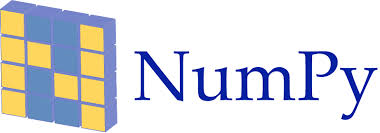
<img src="http://matplotlib.org/2.0.0rc1/_static/logo2.svg">
<img src="http://pandas.pydata.org/_static/pandas_logo.png">
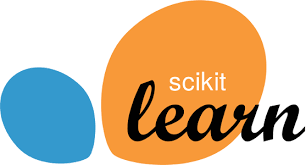

**Why Python?**
    
    
  1.The API is highly consistent and intuitive.
  
  2.Thus it makes the code even more readable and allows you to write code that looks like linear algebra. In addition, the          scientific libraries SciPy and NumPy are compiled using lower-level languages (C and Fortran); this makes doing                  computations with these tools much faster.
 
  3.Its large community and libraries.
  
  4.Python general programming is quite easy as compared to any langauges.
  <img src="https://www.python.org/static/community_logos/python-logo-inkscape.svg">

**What is Jupyter Notebook?** 

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning.


**Why Jupyter Notebook?**

Brian Granger and Fernando Pérez created the IPython (now “Jupyter”) Notebooks web-based technology because of the clear advantages of literate programming and improved web browser technologies (e.g., HTML5). IPython Notebooks relieved the paucity of open-source options. Jupyter notebooks are a series of “cells” containing executable code, or markdown, the popular HTML markup language for prose descriptions. They have LaTeX support for mathematical equations with MathJax, a web browser enhancement for display of mathematics. These notebooks can be saved and easily shared in .ipynb JSON format.

<img src="https://blog.rjmetrics.com/wp-content/uploads/sites/4/2016/02/jupyter.png">  

In [70]:
#Importing all the required dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy import stats
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
import itertools
from tpot import TPOTClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
#The above command is a magic function which allows plots to be shown in the notebook

 Reading the data using the pandas function.
It takes in as a DataFrame ,Since there is already an Index column(Cust_num) we will replace the default index column with the Cust_num ,We then display the first 10 values of the data DataFrame

In [3]:
data=pd.read_csv("bank_market.csv")
data.set_index("Cust_num")
data.head(n=10)

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#We will see the last 10 values of the DataFrame
data.tail(n=10)

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,45202,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,45203,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,45204,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,45206,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,45211,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
#The below command outputs the values in the DataFrame as an numpy array
data.values

array([[1, 58, 'management', ..., 0, 'unknown', 'no'],
       [2, 44, 'technician', ..., 0, 'unknown', 'no'],
       [3, 33, 'entrepreneur', ..., 0, 'unknown', 'no'],
       ..., 
       [45209, 72, 'retired', ..., 3, 'success', 'yes'],
       [45210, 57, 'blue-collar', ..., 0, 'unknown', 'no'],
       [45211, 37, 'entrepreneur', ..., 11, 'other', 'no']], dtype=object)

In [6]:
#We see the Mean,Median,Mode,Maximum,Minimum,1st Quartile,3rd Quartile,Standard-Deviation of the features(same as the columns)
data.describe()

,Cust_num,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#We see the shape of the DataFrame,which shows the number of rows and columns,this gives us the idea how much data are we dealing with 
data.shape

(45211, 18)

In [8]:
#We see the data type of the features
data.dtypes

Cust_num      int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In Machine Learning there three sub-fields
 
** 1.Supervised Learning**
 
** 2.Unsupervised Learning**
 
**3.Reinforcement Learning**

### Supervised Learning
    
    Supervised learning is the machine learning task of training a function from labeled training data. The training data consist of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value
   
   ** Examples:**
           
  1.Linear Regression 
 
 
  2.Logistic Regression       

### Unsupervised Learning

 Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.
 
 **Examples:**
 
  1.Clustering 
 
  2.Neural Network

### Reinforcement Learning 

 Reinforcement Learning is a type of Machine Learning, and thereby also a branch of Artificial Intelligence. It allows machines and software agents to automatically determine the ideal behaviour within a specific context, in order to maximize its performance.

**Examples:**

1.Q-learning

2.Temporal difference learning

In [9]:
#Ours is a Supervised-learning technique as we have the "predictor variable"
Counter(data["y"])

Counter({'no': 39922, 'yes': 5289})

From the above result it's evident that the labeld-class is very much **Imbalanced**.
Which means that only a single value (no) is predominant when compared to the counter value (yes).
This issue will be later solved.

In [10]:
data.isnull().sum()

Cust_num     0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The above outcomes shows us that there are no "NA's" available.NA's are represented as values which are not available.

Thus it shows that there are no missing values present in the dataset,as in real world dataset such as this one,there will be alot of missing values in the dataset.

We then check the columns(Features) of the dataset

In [11]:
data.columns

Index(['Cust_num', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006814B24940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000068156D97B8>]], dtype=object)

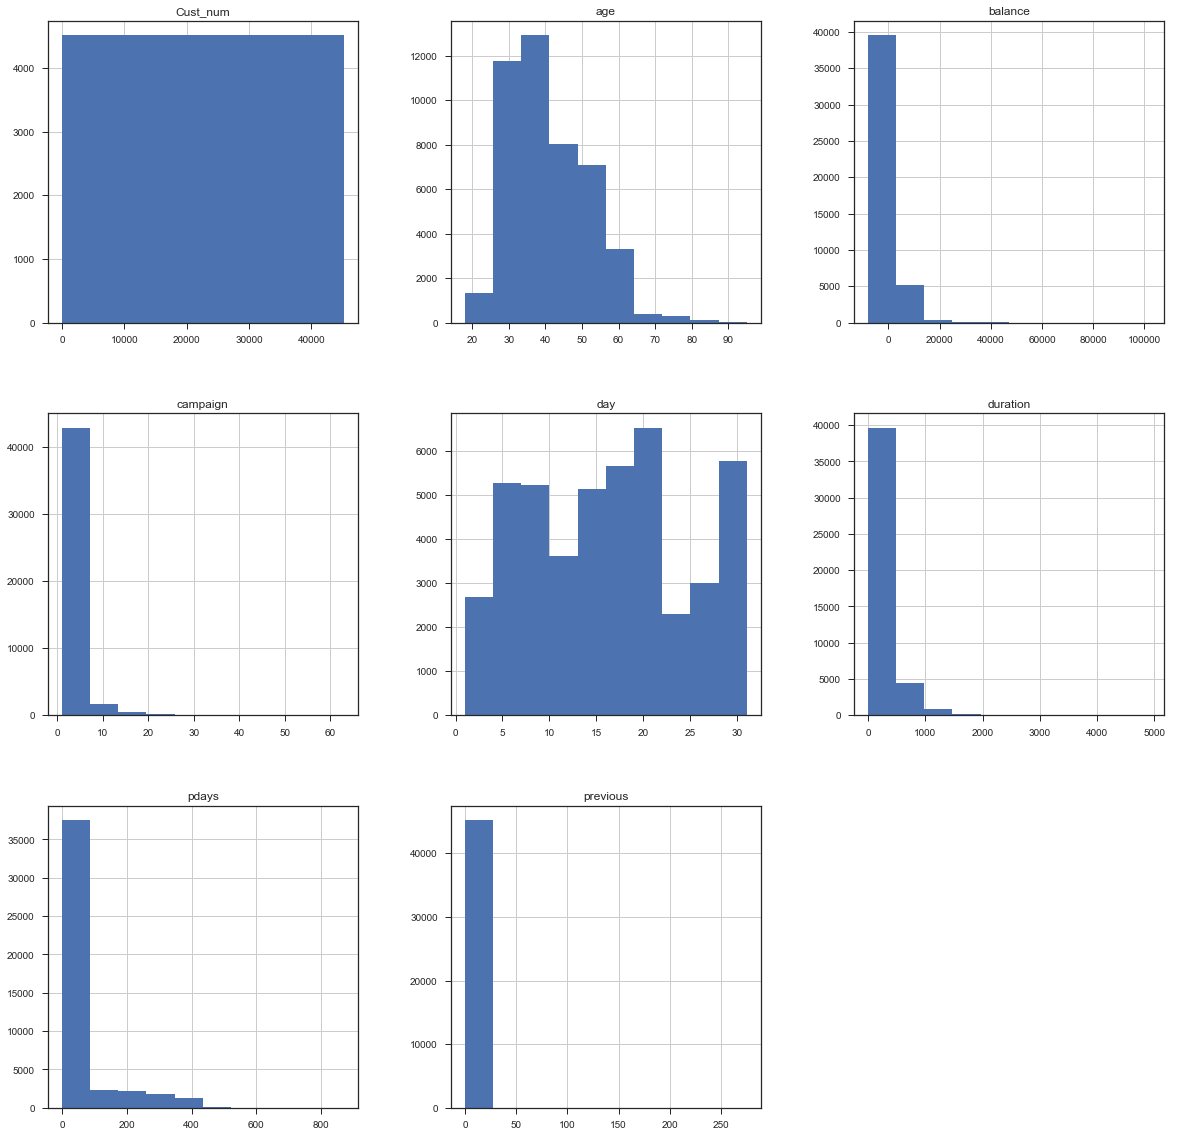

In [12]:
data.hist(figsize=[20,20])

The above plots gives us an understanding of how the values in the features are distributed.
Where the **X-axis** shows the values in the features and the **Y-axis** shows the frequency of the values in the features

For example: In the very first plot,the age is predominant around 35-45 which is reasonable as many of the users are above and less the mentioned criteria

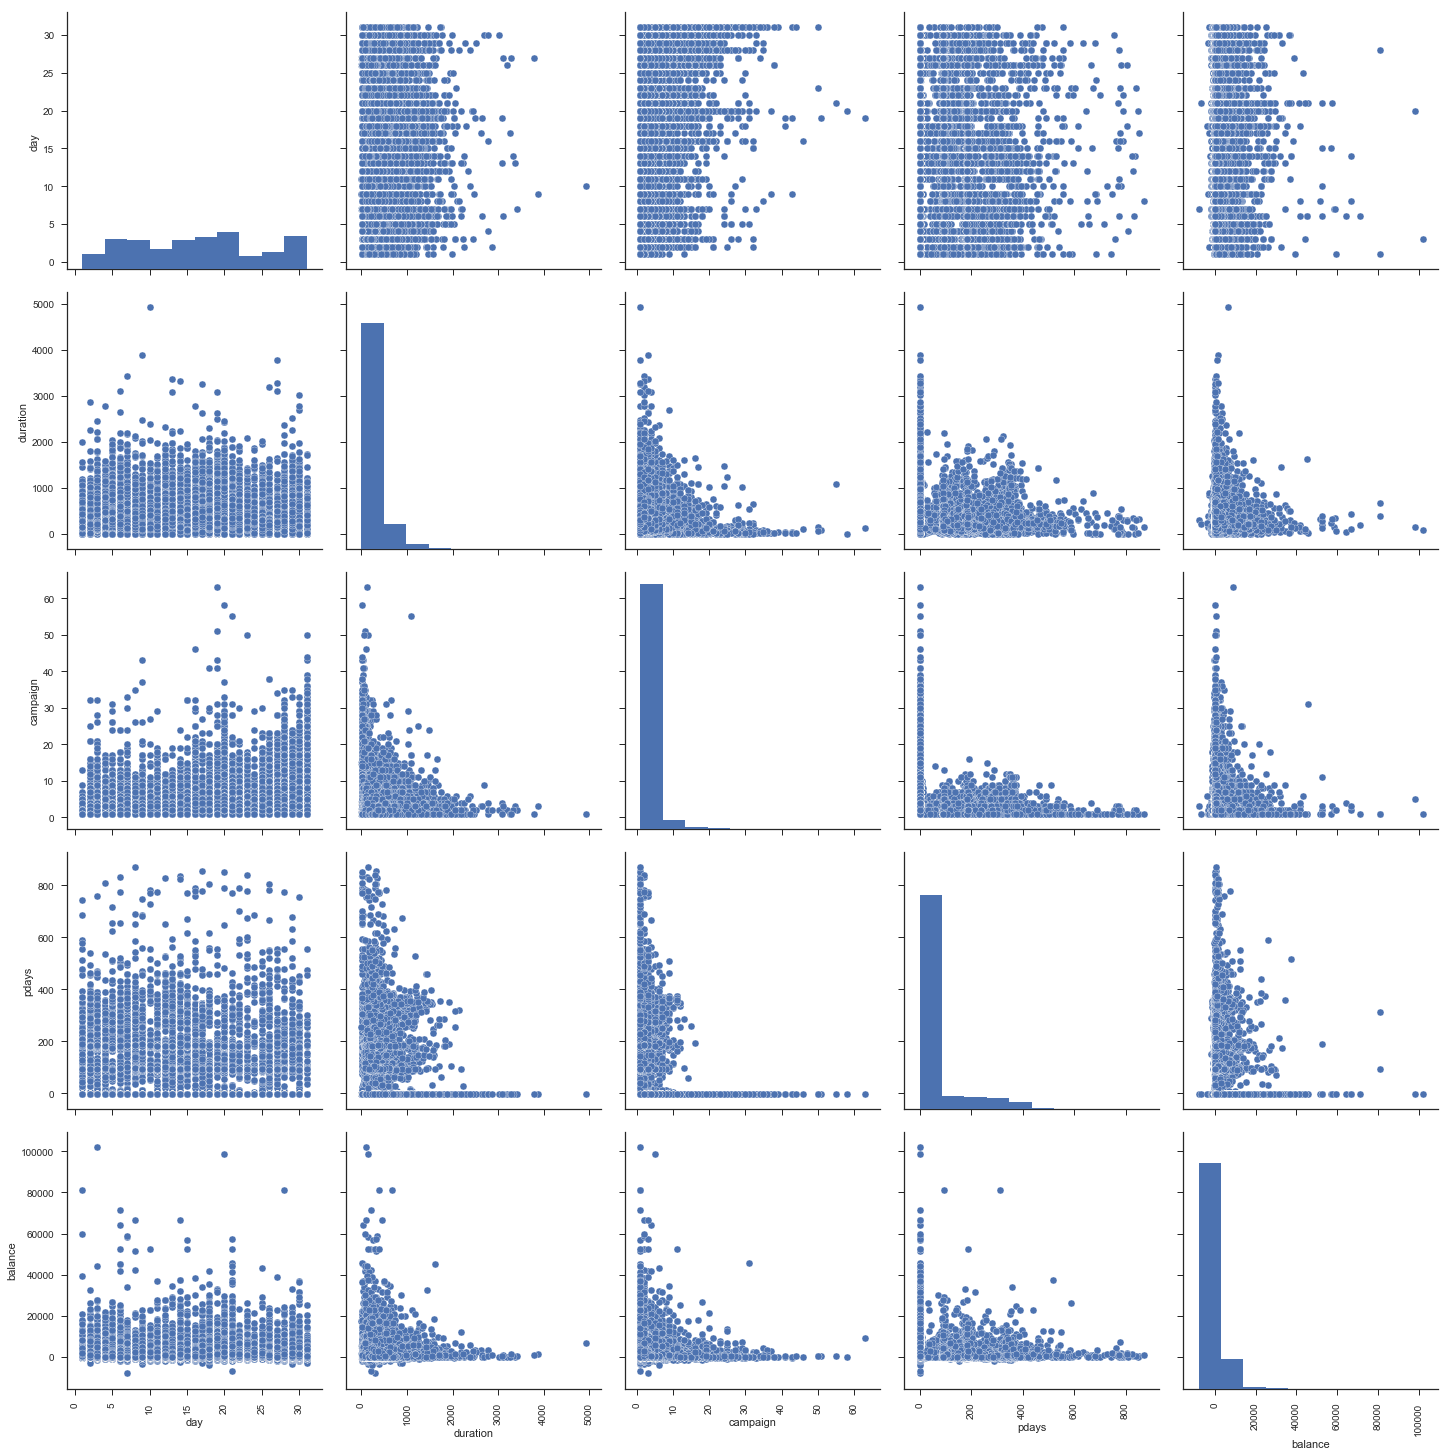

In [13]:
g = sns.pairplot(data[['day','month', 'duration', 'campaign', 'pdays','balance']], diag_kind="hist",size=4)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=90)

Since there is no much insights can be developed with the above plots we look to plot a heatmap to understand if there are any **correlation** between the features

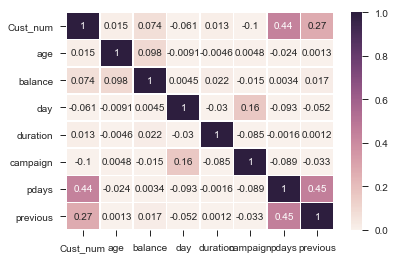

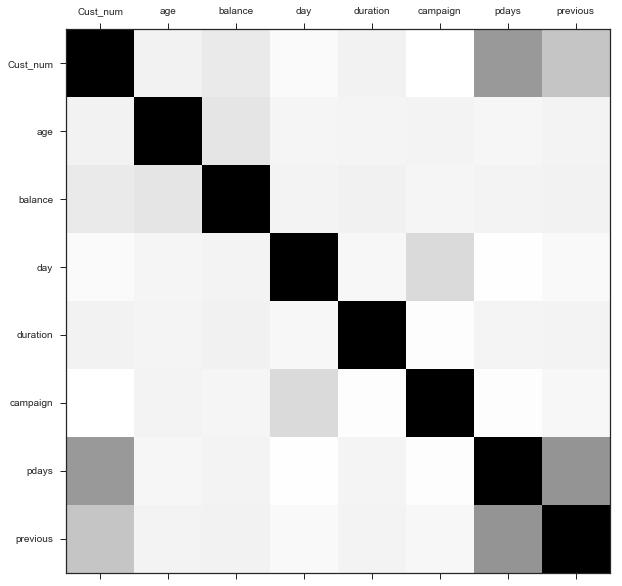

In [14]:
def plot_corr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

#%matplotlib nbagg
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,linewidths=.7,vmin=0, vmax=1,annot=True)
plot_corr(data)

**Correaltion** :A preliminary technique to discover relationships between variables .The heat-map tells us that there is not much relationship between anytwo features only the last two(previous and pdays) are showing some dependecies but that relationship is just vague

### Treating the anomalies and the Outliers

#### Boxplot
A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

#### Quartile distribution

Quartiles in statistics are values that divide your data into quarters. However, quartiles aren’t shaped like pizza slices; Instead they divide your data into four segments according to where the numbers fall on the number line.

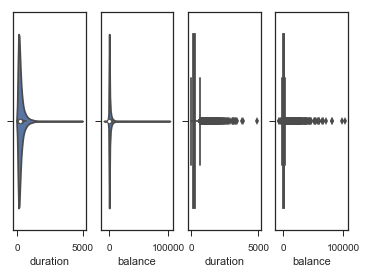

In [15]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, sharey=True)
sns.violinplot(data["duration"],ax=ax1)
sns.violinplot(data["balance"],ax=ax2)
sns.boxplot(data["duration"],ax=ax3)
sns.boxplot(data["balance"],ax=ax4)

In [16]:
percentile_duration=np.percentile(data["duration"],[10,20,30,40,50,60,91,92,93,94,95,96,97,98,99])
percentile_balance=np.percentile(data["balance"],[10,20,30,40,50,60,91,92,93,94,95,96,97,98,99])
print(percentile_duration,"\n \n",percentile_balance)   
   

[   58.     89.    117.    147.    180.    223.    579.    612.    650.
   696.    751.    823.    914.7  1051.   1269. ] 
 
 [     0.      22.     131.     272.     448.     701.    3864.3   4260.4
   4687.3   5134.6   5768.    6572.6   7777.9   9439.4  13164.9]


From the box-plot and the quartile distribution it is evident that the two variables have outliers in them.Even though they might be a real values,the model is taken under-condition for the general-purpose usage where the customers transactions or work are average.We remove the outliers based on the Z-score value of each of the features ,if it is less than three we remove the values

In [17]:
data[(np.abs(stats.zscore(data[["duration","balance"]])) < 3).all(axis=1)].head(n=5)

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Model Building

 We have treated the datasets where we can now build models.Currently there around 173 algorithms and counting.We build the models using some of the algorithm and also try to understand why we have used them. Since it is a supervised learningwe can use some of the supervised learning algorithm

#### Encoding and Spliting the dataset

The machine learning algorithms in the scikit-learn library are created in a way that the inputs can be in numeric values and not strings,this is why encoding of the data is very much required.By using labelencoding we can encode our features to numeric values and then pass it to train_test_split() function. It is neccessary to split the datasets into training and testing this is required as we can later check how well our model is doing when an unknown data is provided.Scikit-learn provides a handy tool for this purpose.
    
    

In [18]:
le=LabelEncoder()
for col in data.columns.values:
    if data[col].dtypes=='object':
        data_new=data[col].append(data[col])
        le.fit(data_new.values)
        data[col]=le.transform(data[col])

X=data[['Cust_num', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome']]
y=data["y"]
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X,y,train_size=0.75)

### Logistic Regression

 Logistic Regression comes in the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose etc.The values are either Zeros and Ones in logistic regression .Our independant variable are also between 0 and 1 so we will  use logistic regression for our model

In [19]:
logit=LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#The score gives out the accuracy of the model while testing with the training values
logit.score(X_test,y_test)

0.89162169335574626

### ROC

Receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity,he false-positive rate is also known as the fall-out or probability of false alarm[1] and can be calculated as (1 − specificity). The ROC curve is thus the sensitivity as a function of fall-out

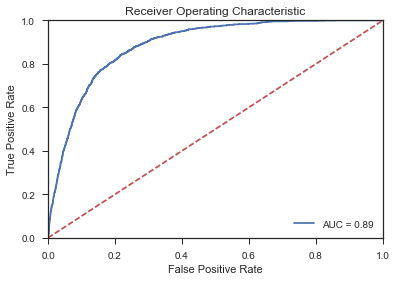

In [21]:
probs = logit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

### Support Vector Machines

They are supervised learning models with associated learning algorithms that analyze data used for classification and    regression analysis.More formally, a support vector machine constructs a hyperplane or set of hyperplanes in a high- or  infinite-dimensional space, which can be used for classification,regression,or other tasks.Intuitively,a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class

In [22]:
SVM = svm.SVC()
SVM.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
SVM.score(X_test,y_test)

0.88498628682650626

### Cross-Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake::a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.This situation is called overfitting.
 
 A solution to this problem is a procedure called cross-validation(CV for short).A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.In the basic approach, called k-fold CV,the training set is split into k smaller sets (other approaches are described below, but generally follow the same principle).The following procedure is followed for each of the k “folds”:
   
1. A model is trained using k-1 of the folds as training data,
  
2. The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [24]:
scores = cross_val_score(LogisticRegression(),X, y, scoring='accuracy', cv=10)
print(scores)
print(np.mean(scores))

[ 0.89053516  0.90336134  0.91218757  0.889405    0.90975448  0.89338642
  0.87569122  0.81973015  0.87414289  0.7       ]
0.866819422771


In [25]:
scores = cross_val_score(svm.SVC(),X, y, scoring='accuracy', cv=10)
print(scores)
print(np.mean(scores))

[ 0.88301636  0.88301636  0.88299049  0.88299049  0.88299049  0.88299049
  0.88299049  0.88299049  0.88299049  0.88318584]
0.88301519914


### Choosing the Hyper-Parameters


Any model will have set of Hyper-Parameters(HP)which needs to be provided to get a better result.Searching the perfect HP for a dataset is always as tedious task.Which is why Scikit-learn provides an easy way to search through the parameters.
**Grid-SearchCV()**.The function helps us to get the right set of parameters for our function.It uses parallel techniques to improve optimization 
   

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5,n_jobs=-1)
grid.fit(X_test,y_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
#Provides the information about each score values obtained for the specific 'C' values
grid.grid_scores_

[mean: 0.88914, std: 0.00363, params: {'C': 0.001},
 mean: 0.88888, std: 0.00341, params: {'C': 0.01},
 mean: 0.89171, std: 0.00456, params: {'C': 0.1},
 mean: 0.89118, std: 0.00135, params: {'C': 1},
 mean: 0.88914, std: 0.00310, params: {'C': 10},
 mean: 0.88826, std: 0.00327, params: {'C': 100},
 mean: 0.88906, std: 0.00298, params: {'C': 1000}]

## Accuracy Paradox


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000068188B3400>]], dtype=object)

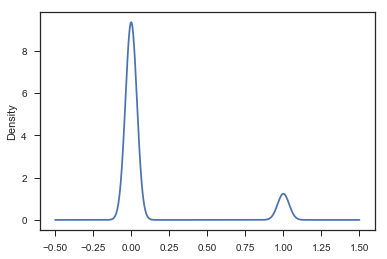

In [28]:
%matplotlib inline
data.y.plot(kind='density', subplots=True, layout=(1,1),sharex=False)

As mentioned earlier the classes in the predictor are highly imbalanced.Even though our model will have an accuracy of 80-90% it does'nt cover the required set of classes,which is my sensitivty and specificty are required to measure the goodness of the model. Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of positives that are correctly identified as such.
**Specificity(also called the true negative rate)**measures the proportion of negatives that are correctly identified as such

In [68]:
y_pred = logit.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP) 
print(Sensitivity,"\n",Specificity)

0.846211714132 
 0.807057057057


In [30]:
sm = SMOTE(random_state=42)
print('Original dataset shape {}'.format(Counter(y)))
X_res, y_res = sm.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Original dataset shape Counter({0: 39922, 1: 39922})


In [31]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X_res,y_res,train_size=0.75)
logit=LogisticRegression()
logit.fit(X_train,y_train)
logit.score(X_test,y_test)
y_pred = logit.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP) 
print(Sensitivity,"\n",Specificity)

0.846211714132 
 0.807057057057


## Genetic Algorithm


 In artificial intelligence, genetic programming (GP) is a technique whereby computer programs are encoded as a set of genes that are then modified (evolved) using an evolutionary algorithm (often a genetic algorithm, "GA") – it is an application of (for example) genetic algorithms where the space of solutions consists of computer programs. The results are computer programs able to perform well in a predefined task.In Python there is a module which allows us to make or do a Genetic algorithm **TPOT (Tree-based Pipeline Optimization Tool)** 
TPOT is a Python tool that automatically creates and optimizes machine learning pipelines using genetic programming.Think of TPOT as your “Data Science Assistant”: TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines, then recommending the pipelines that work best for your data. 

<img src="https://tensorflowkorea.files.wordpress.com/2016/05/tpot-ml-pipeline.png">

      We will use the TPOT classifier to build our model by feeding in the data.Since it goes every model and every feature it takes time.But the TPOT uses parallelism which allows to run the iterations faster.The below code builds the pipeline and then later tries every possible parameters for the model.We then save the value to a file which can be examined later

In [67]:
pipeline_optimizer = TPOTClassifier(verbosity=2,scoring='roc_auc', max_time_mins=2, max_eval_time_mins=0.04, population_size=40,n_jobs=-1)
pipeline_optimizer.fit(X_train, y_train)

Version 0.7.3 of tpot is outdated. Version 0.7.5 was released Friday May 19, 2017.


TPOT closed prematurely. Will use the current best pipeline.



Best pipeline: GaussianNB(input_matrix)


In [69]:
print(pipeline_optimizer.score(X_test, y_test))

0.861603028597


[Keras Deep Learning](https://github.com/Ajay95/Project/blob/master/Bank%20Market%5BDLPNN%5D.ipynb)